<a href="https://colab.research.google.com/github/HWMV/Machine_Learning/blob/main/Machine_Learning6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 선형 회귀
* 선형회귀
  * 단순 선형 회귀 : 독린변수(피처)가 1개
  * 다중 선형 회귀 : 독립변수(피처)가 2개
* 비용함수 (Cost function)
  * 손실함수(Loss), 목적함수(Objectivie)
  (그래프 : 모델과 값의 거리 구하기)
  * 오차(error)를 계산(실제값과 예측값 차이)
  * 평균 제곱 오차를 최소화하는 파라미터 찾음
* 경사하강법 (Gradient Descent)
  * 경사하강법을 활용해 최소 에러 값을 찾음
  (2차 그래프에서 미분을 통한 지점 별 기울기로 구하는 법. 0에 수렴할 수록 좋음)

In [3]:
# 지도 학습(회귀)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# 데이터 불러오기
from sklearn.datasets import load_diabetes

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    x_train, x_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1),
        df['target'],
        test_size=0.2,
        random_state=1004
    )
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = make_dataset()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [9]:
# train 샘플
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [10]:
# target 샘플
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

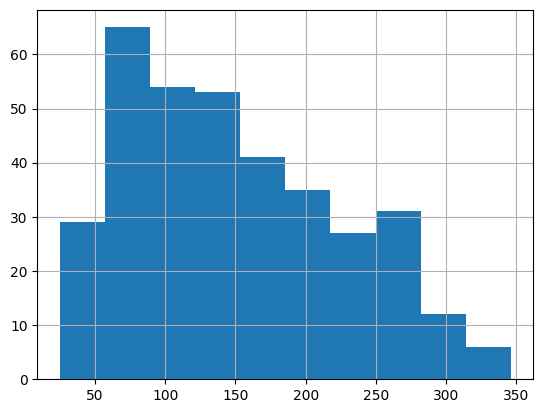

In [11]:
# target 확인
y_train.hist()

선형 회귀

In [13]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)    # mse로 평가해보기

2707.6318521641583

2. 릿지 회귀
* 회귀를 위한 선형 모델
* 규제(regularizatino) 적용
  * 오버피팅 되지 않도록 함
  * 규제 방식 : L2 규제
  * 파라미터(alpha)값을 활용해 조절
  * alpha값이 커질 수록 회귀 계수 값을 작게 만듦

In [14]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1) # alpha1 로 규제할 예정
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)    # mse로 평가해보기

3522.1191842072667

In [20]:
# 회귀 계수 확인 (오차가 릿지가 더 크기 때문에 조절)
coef = pd.DataFrame(data=model.coef_,
                    index=x_train.columns,
                    columns=['alpah1'])
coef

,alpah1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [21]:
# 릿지 회귀 (alpha=10)
model = Ridge(alpha=10) # alpha1 로 규제할 예정
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

5521.884843903383

In [22]:
# 회귀 계수 (alpha=10 일때)
coef['alpha10'] = model.coef_
coef

,alpah1,alpha10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [25]:
# 릿지 회귀 (alpha=0.05)
model = Ridge(alpha=0.05) # alpha1 로 규제할 예정
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

2699.6595785438317

In [26]:
# 회귀 계수 (0.1 일때 저장)
coef['alpha0.05'] = model.coef_
coef

,alpah1,alpha10,alpha0.1,alpha0.05
age,31.293421,16.703166,4.275162,-0.508850
sex,-71.448655,-1.796418,-205.210484,-223.345659
bmi,267.605962,61.026376,450.909749,469.447848
bp,197.362492,47.434846,331.923682,348.368885
s1,14.613257,18.491238,-84.311149,-146.952481
s2,-13.884237,13.440104,-54.662514,-18.297550
s3,-124.649836,-35.542087,-158.706512,-141.658486
s4,106.212967,38.896140,114.066890,115.860926
s5,221.068493,55.276290,391.231834,432.508101
s6,101.202546,35.868345,78.555458,69.578796


3. 라쏘 회귀
* 회귀를 위한 선형 모델
* 규제(regularization) 적용
  * 오버피팅 되지 않도록 함
  * 규제 방식 : L1 규제
  * L2에 비해 회귀 계수를 급격히 감소시켜 0으로 만듦
  * L1 규제는 중요한 피처만 선택하는 특성이 있음
  * 중요한 규제만 확인하고 나머진 0으로 만들어 버림

In [34]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.05)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [30]:
# 회귀 계수(2일때)
coef = pd.DataFrame(data=model.coef_,
                    index=x_train.columns,
                    columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [33]:
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [35]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


4. 엘라스틱넷 회귀
* L2, L1 규제 결합한 회귀
* 시간이 상대적으로 오래 걸림 (규제할 것이 많아서)

In [40]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6) # l1,l2 규제 비율 조절
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

2675.6031657225312

5. 랜덤포레스트 & xgboost (분류도 회귀도 사용)

In [42]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor() # 튜닝없이 그냥 해봄
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

3469.9755292134832

In [44]:
# xgboost
from xgboost import XGBRegressor
model = XGBRegressor() # 튜닝없이 그냥 해봄
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

4265.475533439266

5. 하이퍼 파라미터 튜닝
(그리트서치 & 랜덤서치 활용)

In [45]:
# 하이퍼파라미터 튜닝
# GridSearch 모든 경우의 수를 탐색
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
# 하이퍼파라미터 튜닝
params={
    'learning_rate' :[0.07, 0.05],
    'max_depth':[3,5,7],
    'n_estimators':[100,200],
    'subsample':[0.9,0.8,0.7]
}

In [49]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target',axis=1), df['target']
x, y = make_dataset2()

In [51]:
# GridSearchCV
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1) # (모델, 파라미터, cv, 조건)
grid.fit(x,y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [52]:
# 최적의 파라미터를 찾아보자
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [54]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning = 0.05,
    max_depth = 3,
    n_extimators = 100,
    subsample = 0.7)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
mean_squared_error(y_test, pred)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:12:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learning", "n_extimators" } are not used.

  warnings.warn(smsg, UserWarning)


3892.338694128041

In [55]:
# RandomizedSearchCV
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3,n_iter=10, n_jobs=-1) # (모델, 파라미터, cv, 조건)
grid.fit(x,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [57]:
# 최적의 하이퍼파라미터 찾기
grid.best_params_

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.07}